In [1]:
import numpy as np
import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt
import re

In [2]:
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS

filepath = 'audio/02-11-30.wav'
# true_text = "with the progressive dawn the outlines of an immense camp became visible"
#
# logits = infer_character_distribution(filepath)

files = [
    filepath,
    # 'audio/02-11-30-01.wav',
    # 'audio/02-11-30-02.wav',
    # 'audio/02-11-30-03.wav',
]
true_text = "With the progressive dawn, the outlines of an immense camp became visible: long stretches of several rows of " \
            "barbed wire fences; watch towers; search lights; and long columns of ragged human figures, grey in the greyness of " \
            "dawn, trekking along the straight desolate roads, to what destination we did not know"
logit_list = list()
for file in files:
    logit_list.append(infer_character_distribution(file))
logits = np.vstack(logit_list)

2021-12-02 17:23:41.280283: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-02 17:23:41.283615: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [3]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
0 days 00:00:00,4.569644e-06,1.763652e-04,5.710186e-06,6.143136e-06,4.766311e-06,6.647478e-06,4.470533e-06,1.333769e-05,1.986128e-06,1.421380e-05,...,9.459860e-05,4.478131e-05,6.700915e-07,5.144923e-07,1.914357e-05,3.438750e-07,9.267599e-06,2.056929e-08,4.862135e-07,0.999560
0 days 00:00:00.020000,1.204923e-06,1.222583e-06,2.071780e-07,1.570735e-07,4.843417e-08,4.662074e-07,1.875745e-07,4.987580e-07,3.972858e-08,9.292704e-07,...,1.896622e-06,2.981164e-06,1.568315e-07,3.096529e-09,6.986882e-07,1.828158e-09,6.576433e-08,1.928131e-10,2.140874e-09,0.999988
0 days 00:00:00.040000,6.484457e-09,5.222430e-09,9.314582e-09,6.419932e-10,1.459935e-08,6.982251e-09,8.521935e-09,1.053355e-08,6.778016e-10,9.814867e-08,...,3.449777e-07,1.372814e-06,1.300218e-10,6.703308e-12,1.035638e-08,1.196605e-15,3.298127e-09,3.496947e-15,1.417957e-12,0.999998
0 days 00:00:00.060000,1.315310e-07,1.088299e-07,3.244032e-07,4.414533e-08,2.911680e-07,2.754994e-07,7.284179e-08,5.073473e-08,1.053466e-06,2.902215e-07,...,1.540661e-07,1.788668e-06,1.770075e-07,1.185754e-09,1.183437e-06,5.569158e-10,4.248966e-06,6.348271e-11,2.535115e-09,0.999987
0 days 00:00:00.080000,1.508384e-07,1.718764e-07,7.014654e-07,7.380709e-08,3.359078e-07,3.084807e-07,1.144086e-07,8.761028e-08,1.506231e-06,5.399394e-07,...,5.263780e-08,6.249165e-07,1.050810e-07,1.134073e-09,6.060273e-07,3.342732e-10,9.859546e-06,2.071137e-10,8.314792e-09,0.999982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:20.060000,5.745479e-02,3.664524e-02,3.177409e-02,3.345257e-02,2.881138e-02,3.308385e-02,3.251285e-02,2.694841e-02,3.605718e-02,3.451315e-02,...,4.247215e-02,4.649974e-02,2.633141e-02,2.892594e-02,3.250973e-02,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:00:20.080000,5.745479e-02,3.664524e-02,3.177409e-02,3.345257e-02,2.881138e-02,3.308385e-02,3.251285e-02,2.694841e-02,3.605718e-02,3.451315e-02,...,4.247215e-02,4.649974e-02,2.633141e-02,2.892594e-02,3.250973e-02,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:00:20.100000,5.745479e-02,3.664524e-02,3.177409e-02,3.345257e-02,2.881138e-02,3.308385e-02,3.251285e-02,2.694841e-02,3.605718e-02,3.451315e-02,...,4.247215e-02,4.649974e-02,2.633141e-02,2.892594e-02,3.250973e-02,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:00:20.120000,5.745479e-02,3.664524e-02,3.177409e-02,3.345257e-02,2.881138e-02,3.308385e-02,3.251285e-02,2.694841e-02,3.605718e-02,3.451315e-02,...,4.247215e-02,4.649974e-02,2.633141e-02,2.892594e-02,3.250973e-02,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960


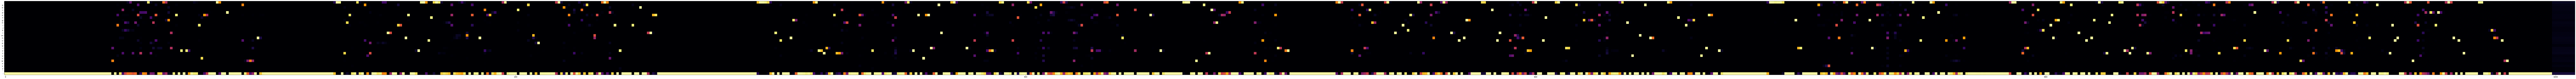

In [4]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [5]:
# Top three characters for every moment
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

top = np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])
pd.DataFrame(top, index=timesteps)

,0,1,2,3,4,5
0 days 00:00:00,-,a,s,1.0,0.0,0.0
0 days 00:00:00.020000,-,t,s,1.0,0.0,0.0
0 days 00:00:00.040000,-,t,s,1.0,0.0,0.0
0 days 00:00:00.060000,-,y,t,1.0,0.0,0.0
0 days 00:00:00.080000,-,y,h,1.0,0.0,0.0
...,...,...,...,...,...,...
0 days 00:00:20.060000,-,,t,0.1,0.06,0.05
0 days 00:00:20.080000,-,,t,0.1,0.06,0.05
0 days 00:00:20.100000,-,,t,0.1,0.06,0.05
0 days 00:00:20.120000,-,,t,0.1,0.06,0.05


In [6]:
start_s, end_s = 0, len(logits) * STEP_MS / 1000 # 5.2  # seconds of start and end of the target clip
start_t, end_t = int(start_s * 1000 / STEP_MS), int(end_s * 1000 / STEP_MS) + 1 # +1 b/c end-exclusive

probs = logits.copy()[start_t:end_t, :]  # the progressive dawn
probs[:, 0] += probs[:, -1]  # mix spaces and blanks (for simplicity)

# If the model inserts a blank or a space after a character,
# prolong that character's probability so that DTW simply repeats it,
# instead of stopping the thread, for example:
#   blank  d    a    w        blank  d    a    w
#     0    0.8  0    0          0    0.8  0    0
#     0.5  0.1  0    0          0.5  0.5  0    0
#     0.8  0    0    0    ->    0.8  0.4  0    0
#     0.1  0    0.7  0          0.1  0    0.7  0
#     0    0    0    0.7        0    0    0    0.7
for i in range(1, len(probs)):
    probs[i, 1:-1] += probs[i, 0] * probs[i - 1, 1:-1]

# Surround with blanks b/c recording has silence in the beginning and at the end
# and one of assumptions of DTW is that index of one array maps onto first index of the other array
# transcript = ' with the progressive dawn '
# transcript = ' the outlines of an immense camp became visible '
# transcript = ' with the progressive dawn the outlines of an immense camp became visible '
# remove non-alpha chars, make all lower case and pad with spaces
transcript = ' ' + re.compile(r'[^a-zA-Z\ ]').sub('', true_text).lower() + ' '
# transcript = ' ' + true_text + ' '

trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

trpt_inds = trpt_ind_map[list(transcript)].values
p_fit = probs[:, trpt_inds]

mapping = pd.DataFrame(p_fit, columns=list(transcript))
mapping

,,w,i,t,h,,t,h,e,,...,,n,o,t,,k,n,o,w,
0,0.999565,0.000019,0.000014,0.000045,0.000002,0.999565,0.000045,0.000002,0.000007,0.999565,...,0.999565,0.000007,0.000005,0.000045,0.999565,0.000003,0.000007,0.000005,0.000019,0.999565
1,0.999989,0.000020,0.000015,0.000048,0.000002,0.999989,0.000048,0.000002,0.000007,0.999989,...,0.999989,0.000007,0.000005,0.000048,0.999989,0.000003,0.000007,0.000005,0.000020,0.999989
2,0.999998,0.000020,0.000015,0.000049,0.000002,0.999998,0.000049,0.000002,0.000007,0.999998,...,0.999998,0.000007,0.000005,0.000049,0.999998,0.000003,0.000007,0.000005,0.000020,0.999998
3,0.999987,0.000021,0.000016,0.000051,0.000003,0.999987,0.000051,0.000003,0.000007,0.999987,...,0.999987,0.000007,0.000006,0.000051,0.999987,0.000003,0.000007,0.000006,0.000021,0.999987
4,0.999982,0.000022,0.000016,0.000052,0.000005,0.999982,0.000052,0.000005,0.000008,0.999982,...,0.999982,0.000007,0.000006,0.000052,0.999982,0.000003,0.000007,0.000006,0.000022,0.999982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.156415,0.038627,0.040909,0.055116,0.042739,0.156415,0.055116,0.042739,0.039215,0.156415,...,0.156415,0.049449,0.045949,0.055116,0.156415,0.031008,0.049449,0.045949,0.038627,0.156415
1004,0.156415,0.038552,0.040912,0.055121,0.042742,0.156415,0.055121,0.042742,0.039218,0.156415,...,0.156415,0.049453,0.045953,0.055121,0.156415,0.031011,0.049453,0.045953,0.038552,0.156415
1005,0.156415,0.038540,0.040912,0.055121,0.042743,0.156415,0.055121,0.042743,0.039218,0.156415,...,0.156415,0.049454,0.045953,0.055121,0.156415,0.031011,0.049454,0.045953,0.038540,0.156415
1006,0.156415,0.038538,0.040912,0.055122,0.042743,0.156415,0.055122,0.042743,0.039218,0.156415,...,0.156415,0.049454,0.045953,0.055122,0.156415,0.031011,0.049454,0.045953,0.038538,0.156415


In [7]:
import utils.fastdtw
from importlib import reload
reload(utils.fastdtw)
from utils.fastdtw import fastdtw

trpt_inds = trpt_ind_map[list(transcript)].values
dist, path = fastdtw(np.arange(len(probs)), trpt_inds, radius=50,
                     dist=lambda mat_i, trpt_i: -probs[int(mat_i), int(trpt_i)])
# for i, j in path:
#     print(i, j, transcript[j])

In [8]:
import struct
import wave


def read_samples(wave_file, nb_frames):
    frame_data = wave_file.readframes(nb_frames)
    if frame_data:
        sample_width = wave_file.getsampwidth()
        nb_samples = len(frame_data) // sample_width
        format = {1: "%db", 2: "<%dh", 4: "<%dl"}[sample_width] % nb_samples
        return struct.unpack(format, frame_data)
    else:
        return ()


w = wave.open(filepath, 'r')
samples = np.array(read_samples(w, w.getnframes()))

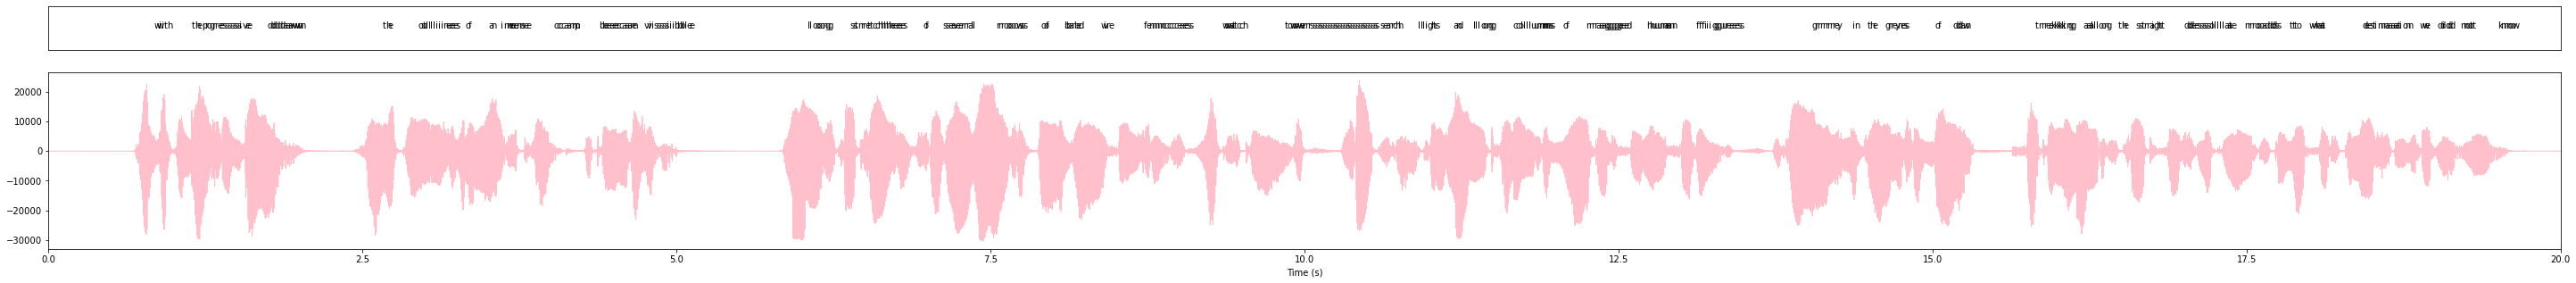

In [58]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(end_t / 20, 5), gridspec_kw=dict(height_ratios=[1, 4]))

sub_samples = samples[int(start_s * w.getframerate()):int(end_s * w.getframerate())].copy()

t = np.linspace(0, len(sub_samples) / w.getframerate(), len(sub_samples))
ax2.plot(t, sub_samples, color='pink', lw=1)

ms_per_step = np.linspace(STEP_MS, STEP_MS, num=end_t)
next_j = path[1][1]
for i, (rec_i, trpt_i) in enumerate(path[:-1]):
    next_j = path[i + 1][1]
    if rec_i != next_j:
        ax1.annotate(transcript[trpt_i], xy=(rec_i * ms_per_step[rec_i] / 1000, 0.5))
    # print(i, j, transcript[i])

ax2.set_xlim(0, t.max())
ax1.set_xlim(0, t.max())

ax2.set_xlabel('Time (s)')
# hide axes for text
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.show()

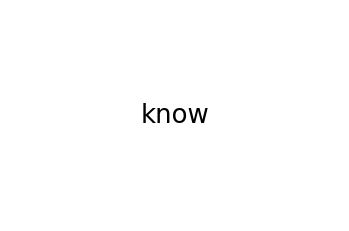

In [61]:
from matplotlib import animation

spaces = np.argwhere(trpt_inds == 0)[:, 0]
word_starts = spaces[:-1] + 1
word_ends = spaces[1:]# - 1
np.vstack([word_starts, word_ends])

ind_word_mad = pd.Series([np.nan] * len(trpt_inds))
ind_word_mad[word_starts] = np.arange(len(word_starts))
ind_word_mad = ind_word_mad.ffill()


def animate(step):
    plt.cla()
    plt.gca().axis('off')
    trpt_i = path[step][1]
    word_i = ind_word_mad[trpt_i]
    if pd.isna(word_i):  # words haven't began yet
        word = ''
    else:
        word_i = int(word_i)
        word = transcript[word_starts[word_i]: word_ends[word_i]]
    return [plt.annotate(word, xy=(0.5, 0.5), fontsize=26, ha='center', va='center')]

anim = animation.FuncAnimation(plt.figure(),
                               animate,
                               frames=len(probs),
                               interval=STEP_MS,
                               blit=True)
anim.save('out/animation.mp4', writer='ffmpeg')

In [62]:
import os

# These ones are run for each batch
cmd = f"ffmpeg -i out/animation.mp4 -i {filepath} -c:v copy -c:a aac out/out.mp4"
os.system(cmd)

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 11.1.0
  configuration: --prefix=/Users/breedoon/.conda/envs/CP --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1627813741069/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc    55.  7.100 / 55.  7.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out/animation.mp4':

0

In [202]:
import os

# These ones are run for each batch
# cmd = f"ffmpeg -i out/animation-2.mp4 -i {filepath} -c:v copy -c:a aac out/output-2.mp4"
# os.system(cmd)

# Truncate the files
cmd = f"ffmpeg -ss 0 -i out/output-1.mp4 -to 2.3 -c copy -copyts out/preout-1.mp4"
os.system(cmd)
cmd = f"ffmpeg -i out/output-2.mp4 -ss 2.3 -c copy -copyts out/preout-2.mp4"
os.system(cmd)

# Merge them using 2 temp files
cmd = """ffmpeg -i out/preout-1.mp4 -c copy -bsf:v h264_mp4toannexb -f mpegts out/temp1.ts"""
os.system(cmd)
cmd = """ffmpeg -i out/preout-2.mp4 -c copy -bsf:v h264_mp4toannexb -f mpegts out/temp2.ts"""
os.system(cmd)
cmd = """ffmpeg -i "concat:out/temp1.ts|out/temp2.ts" -c copy -bsf:a aac_adtstoasc out/output.mp4"""
os.system(cmd)

0